In [1]:
from DataPreprocessing import *

In [2]:
data_path= '/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar'

trials_intervals = np.load(data_path+'/'+'trials.intervals.npy') # in seconds
spike_times = np.load(data_path+'/'+'spikes.times.npy') * 1000 # Unbinned spike times in ms
trials_gocue_times = np.load(data_path+'/'+'trials.goCue_times.npy') 
trials_response_choice = np.load(data_path+'/'+'trials.response_choice.npy') # -1 left, 1, right, 0 no response
spontaneous_intervals = np.load(data_path+'/'+'spontaneous.intervals.npy')
trials_response_time = np.load(data_path+'/'+'trials.response_times.npy')
spike_clusters = np.load(data_path+'/'+'spikes.clusters.npy')
site_positions = np.load(data_path+'/'+'channels.sitePositions.npy')
clusters_depths = np.load(data_path+'/'+'clusters.depths.npy')
clusters_annotation = np.load(data_path+'/'+'clusters._phy_annotation.npy')
channel_sites = np.load(data_path+'/'+'channels.site.npy')
channels_brainlocation = pd.read_csv(data_path+'/'+'channels.brainLocation.tsv', sep='\t')
clusters_probes = np.load(data_path+'/'+'clusters.probes.npy')
channels_probe = np.load(data_path+'/'+'channels.probe.npy')
trials_visual_time = np.load(data_path+'/'+'trials.visualStim_times.npy')

visual_times = trials_visual_time

In [12]:
def reshape_concat(concat_spike_times,period=10000):
    concat_spike_times_=[]
    for j in range(0,concat_spike_times.shape[0]):
        concat_spike_times_.append(concat_spike_times[j][:period])
    concat_spike_times_=np.array(concat_spike_times_)
    return concat_spike_times_

def plot_left_right_PCA(bs,input_regions):
    good_cells, brain_regions,br = get_good_cells(data_path) # Get brain regions
    spike_time_binned, spike_time_cells, cell_spikes_max = bin_spikes(spike_times,spike_clusters,clusters_annotation,bin_size=bs)
    spike_time_binned_trial_response, test = sort_cells_trials(spike_time_binned,spike_time_cells,trials_intervals,trials_visual_time,bin_size=bs,epoch_duration=2000)
    
    left_spike_time_response, right_spike_time_response, no_response_spike_time_response = sort_cells_trial_types(spike_time_binned_trial_response,trials_intervals,spike_time_cells,trials_response_choice)
    

    regional_left_spike = sort_cells_brain_regions(left_spike_time_response, input_regions,brain_regions,clusters_annotation)#'SCm','MRN','APN','PAG','ZI')
    regional_right_spike=sort_cells_brain_regions(right_spike_time_response,input_regions,brain_regions,clusters_annotation)#'SCm','MRN','APN','PAG','ZI')
    concat_left_spike_times = concat_trials_2_timeseries(regional_left_spike)
    concat_right_spike_times=concat_trials_2_timeseries(regional_right_spike)
    print(concat_left_spike_times[0].shape)
    concat_left_spike_times_ = reshape_concat(concat_left_spike_times)
    concat_right_spike_times_=reshape_concat(concat_right_spike_times)

    from sklearn.decomposition import PCA
    left_p=PCA(n_components=10)
    right_p=PCA(n_components=10)


    left_pcs=left_p.fit_transform(concat_left_spike_times_.T)
    right_pcs=right_p.fit_transform(concat_right_spike_times_.T)

    plt.scatter(left_pcs[:,0],left_pcs[:,1],color='orange',label='left')
    plt.scatter(right_pcs[:,0],right_pcs[:,1],color='blue',label='right')
    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

(57213,)


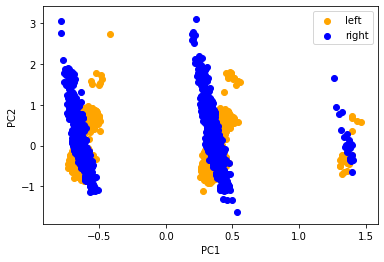

In [13]:
plot_left_right_PCA(5,['MOs', 'MRN', 'OLF', 'ORB', 'PAG', 'RSP', 'SCm', 'SCs'])

(57213,)


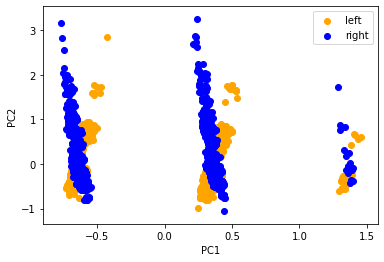

In [14]:
plot_left_right_PCA(5,['SCs','SCm','MRN','APN','PAG','ZI'])

In [ ]:
plot_left_right_PCA(5,['SCs','SCm','MRN','APN','PAG','ZI'])